true: 4, pred: 4


/home/asubuntus/miniconda3/envs/sanity_checks_pytorch/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448255797/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


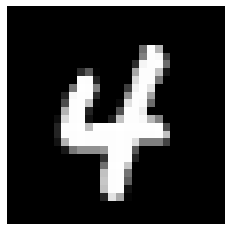

true: 1, pred: 1


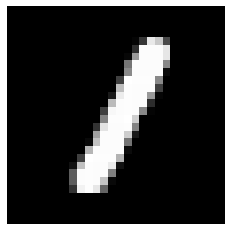

true: 3, pred: 3


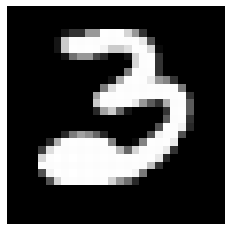

true: 8, pred: 8


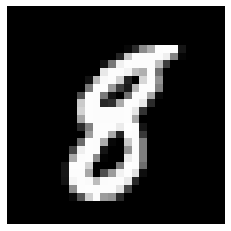

true: 5, pred: 5


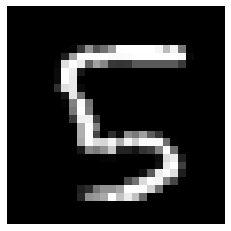

true: 5, pred: 5


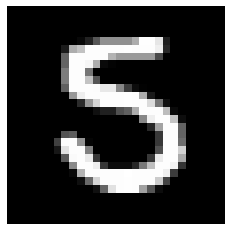

true: 7, pred: 7


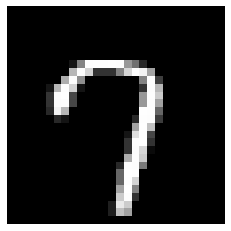

true: 9, pred: 9


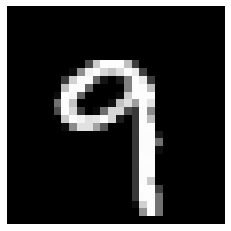

true: 7, pred: 7


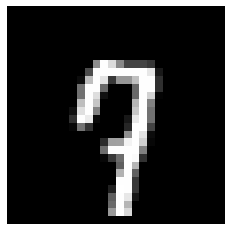

true: 3, pred: 3


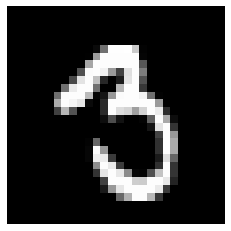

In [1]:
from torchvision import datasets, transforms
import torch
import numpy as np
import matplotlib.pyplot as plt

model = torch.load('models/cnn_mnist.pt', map_location=torch.device('cpu'))
model.eval()

transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

dataset = datasets.MNIST('data', train=False, transform=transform)
dataset_subset = torch.utils.data.Subset(dataset, np.random.choice(len(dataset), 10, replace=False))
test_loader = torch.utils.data.DataLoader(dataset_subset, batch_size=1, shuffle=False)

for image, label in test_loader:
    pred = model(image).argmax(axis=1)
    npimg = np.squeeze(np.squeeze(image.numpy()))
    plt.imshow(npimg, cmap='gray')
    print(f'true: {label[0]}, pred: {pred[0]}')
    plt.axis('off')
    plt.show()

In [79]:
from torch.nn.modules.conv import Conv2d
from torch.nn.modules.linear import Linear
from torch.nn.modules.container import Sequential
from torchvision.models.resnet import BasicBlock

def rand_layers(model, module_paths):
    for module_path in module_paths:
        cur = model
        for name in module_path:
            cur = getattr(cur, name)
        randomize(cur)
        
def randomize(layer):
    if isinstance(layer, (Conv2d, Linear)):
        std, mean = torch.std_mean(layer.weight)
        layer.weight = torch.nn.Parameter(torch.empty(layer.weight.size()).normal_(mean=mean.item(),std=std.item()))
    elif isinstance(layer, (BasicBlock, Sequential)):
        for child in layer.children():
            randomize(child)

In [80]:
import torchvision.models as models
resnet = models.resnet18(pretrained=True)

In [82]:
print(resnet.layer4[1].conv2.weight)
rand_layers(resnet, [['fc'], ['layer4', '1']])
print(resnet.layer4[1].conv2.weight)

Parameter containing:
tensor([[[[-2.0184e-03,  1.0156e-02, -1.7797e-02],
          [ 1.5200e-02, -9.1973e-03,  1.1061e-02],
          [ 5.7524e-03, -5.4444e-03, -7.5892e-03]],

         [[-8.7565e-03, -7.7979e-03,  1.0326e-02],
          [ 1.5131e-02,  1.7407e-03, -9.0403e-03],
          [-8.8836e-03, -1.5509e-02,  9.1819e-03]],

         [[ 1.4661e-02,  1.3655e-02, -3.2927e-03],
          [-8.5866e-03,  8.3069e-03,  1.3303e-02],
          [-3.7974e-03, -1.4028e-02, -4.8824e-03]],

         ...,

         [[ 1.6160e-02, -9.0241e-03,  1.3096e-02],
          [-1.4290e-02,  1.1427e-02,  1.7484e-02],
          [ 2.5522e-02,  2.0583e-02, -8.3192e-03]],

         [[ 7.8679e-03, -1.3005e-03, -1.5690e-02],
          [ 8.3131e-03,  5.4875e-03,  6.9276e-03],
          [-3.1571e-03,  1.4759e-02, -6.6919e-03]],

         [[ 2.5090e-02,  5.7160e-03, -1.5239e-02],
          [ 1.9716e-02,  1.8487e-02, -3.6067e-03],
          [ 7.0685e-03, -1.1099e-02, -1.4289e-03]]],


        [[[ 1.3481e-02,  9.6053

In [85]:
model

Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=3136, out_features=1024, bias=True)
  (8): ReLU()
  (9): Linear(in_features=1024, out_features=10, bias=True)
)

In [84]:
module_paths = [['linear2'], ['linear1'], ['conv2'], ['conv1']]

print(model[9].weight)
rand_layers(model, [['9']])
print(model[9].weight)

Parameter containing:
tensor([[ 0.0391,  0.0133,  0.0003,  ..., -0.0174,  0.0240, -0.0504],
        [ 0.0533,  0.0319, -0.0336,  ...,  0.0105, -0.0105,  0.0065],
        [-0.0305,  0.0003, -0.0082,  ...,  0.0383, -0.0033, -0.0018],
        ...,
        [ 0.0472,  0.0108, -0.0460,  ..., -0.0641,  0.0164, -0.0628],
        [ 0.0057,  0.0244,  0.0394,  ...,  0.0432,  0.0251,  0.0316],
        [-0.0071, -0.0386, -0.0846,  ..., -0.0622,  0.0086,  0.0065]],
       requires_grad=True)
Parameter containing:
tensor([[ 0.0293,  0.0218, -0.0153,  ..., -0.0191,  0.0145,  0.0103],
        [-0.0319, -0.0144,  0.0183,  ..., -0.0015, -0.0161, -0.0094],
        [ 0.0195, -0.0278,  0.0368,  ...,  0.0727, -0.0332, -0.0172],
        ...,
        [-0.0237, -0.0578, -0.0413,  ...,  0.0146, -0.0244,  0.0207],
        [ 0.0310,  0.0665, -0.0226,  ..., -0.0189,  0.0232,  0.0119],
        [-0.0503, -0.0096,  0.0731,  ..., -0.0574,  0.0207,  0.0091]],
       requires_grad=True)


In [47]:
from torchviz import make_dot
import torchvision

x = torch.zeros(1, 3, 224, 224, dtype=torch.float, requires_grad=False)
out = resnet(x)
# with open('graph', 'wb') as f:
#     f.write(make_dot(out))  # plot graph of variable, not of a nn.Module
make_dot(out).render("attached", format="png")
# arr = [['layer', '0']]
# resnet
#getattr(getattr(resnet, 'layer1'), '0')
for k in resnet.modules():
    if isinstance(k, torch.nn.modules.container.Sequential):
        print(k.children())
        print(k.downsample)
#         for l in k.modules():
#             print(l)
        
print(type(resnet.layer4[0].conv1))

    
#getattr(getattr(getattr(resnet, 'layer1'), '0'), 'conv1')

<generator object Module.children at 0x7f0daf55eba0>


AttributeError: 'Sequential' object has no attribute 'downsample'

Approximation delta:  tensor([0.0016], dtype=torch.float64)


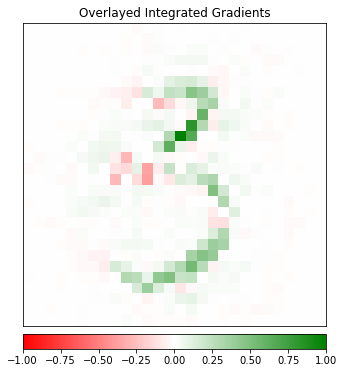

Approximation delta:  tensor([0.0103], dtype=torch.float64)


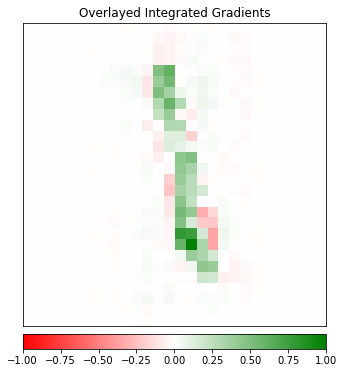

Approximation delta:  tensor([0.0231], dtype=torch.float64)


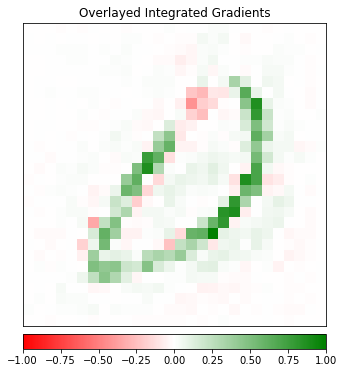

Approximation delta:  tensor([0.0327], dtype=torch.float64)


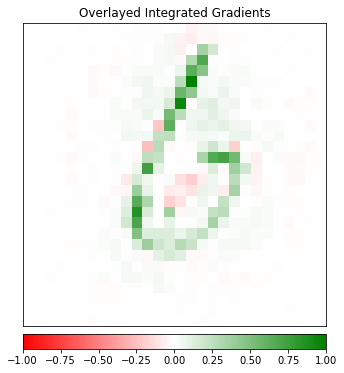

Approximation delta:  tensor([0.0161], dtype=torch.float64)


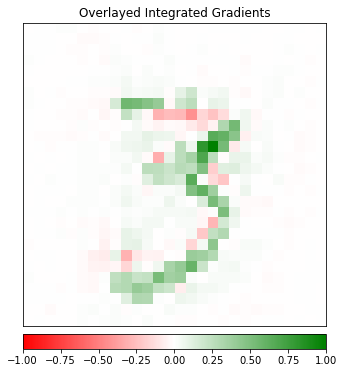

Approximation delta:  tensor([0.0360], dtype=torch.float64)


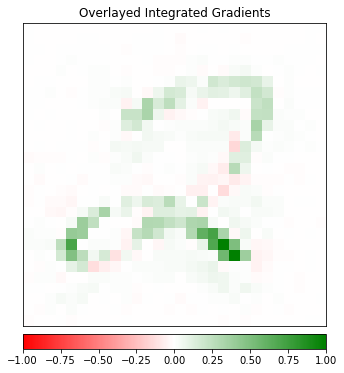

Approximation delta:  tensor([0.0025], dtype=torch.float64)


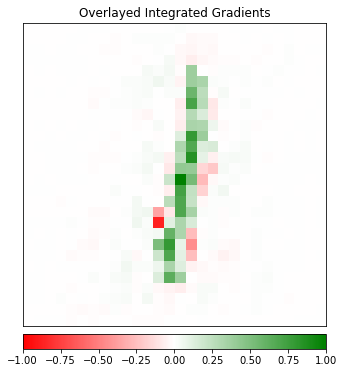

Approximation delta:  tensor([0.0176], dtype=torch.float64)


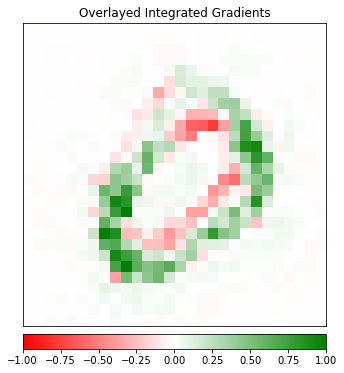

Approximation delta:  tensor([0.0065], dtype=torch.float64)


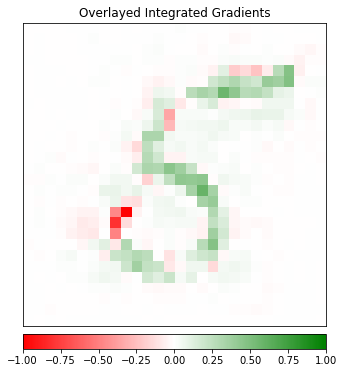

Approximation delta:  tensor([0.0196], dtype=torch.float64)


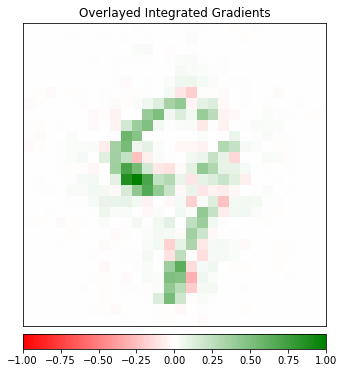

In [28]:
from captum.attr import IntegratedGradients
from captum.attr import visualization as viz

def attribute_image_features(algorithm, input, label, **kwargs):
    model.zero_grad()
    tensor_attributions = algorithm.attribute(input, target=label, **kwargs)
    
    return tensor_attributions

ig = IntegratedGradients(model)

for image, label in test_loader:
    image.requires_grad = True
    attr_ig, delta = attribute_image_features(ig, image, label=label, baselines=image * 0, return_convergence_delta=True)
    attr_ig = np.transpose(attr_ig.squeeze(0).cpu().detach().numpy(), (1,2,0))
    print('Approximation delta: ', abs(delta))
    original_image = np.transpose(image.squeeze(0).cpu().detach().numpy(), (1, 2, 0))
    _ = viz.visualize_image_attr(attr_ig, original_image, method="heat_map",sign="all",
                          show_colorbar=True, title="Overlayed Integrated Gradients")
